## Supervised Learning
## Project: Churn Detection in Telecommunications

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' churn behavior in a telecommunications sample dataset. The analysis includes finding the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. The goal with this implementation is to construct a model that accurately predicts whether an individual will churn. This sort of task can arise in telecommunications company or subscription-based service offering, where organizations spend many resources to retain customers.  Understanding an churn risk can help a telecommunications provider better allocate resources to individuals who are at risk,  While it can be difficult to determine an individual's churn risk, we are able to model it using previous behavior from historical customer's who did or did not churn.


----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the churn data. Note that the last column from this dataset, `'churn'`, will be our target label (whether an individual will churn or not from the sample organizations). All other columns are features about each individual in the telco customer database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import warnings
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("churn_data.csv")

# Success - Display the first record
display(data.head(n=1))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


** Featureset Exploration **

* **customerID**: Customer ID
* **gender**:Whether the customer is a male or a female
* **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenureNumber**: # of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not (Yes, No)
* **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMoviesWhether**: the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not (Yes or No)

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals churned or not. Also, what percentage of the total populate churned.

Total number of records: 7043
Individuals who churned: 1869
Individuals who did not churn: 5174
Percentage of individuals who churned: 26.54%


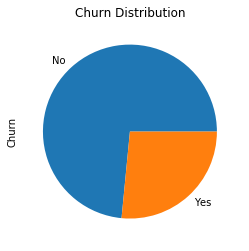

In [2]:
#Total number of records
n_records = len(data)

# Number of records where individual's income is more than $50,000
churn_count = len(data[data.Churn == 'Yes'])

#Number of records where individual's income is at most $50,000
nochurn_count = len(data[data.Churn == 'No'])

# Percentage of individuals whose income is more than $50,000
churn_percent = churn_count / n_records

df = pd.DataFrame(data, index= data.columns)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals who churned: {}".format(churn_count))
print("Individuals who did not churn: {}".format(nochurn_count))
print("Percentage of individuals who churned: {}%".format(round(churn_percent*100, 2)))
pd.value_counts(data['Churn']).plot(kind="pie",title="Churn Distribution")

### Implementation: Exploratory Visualization


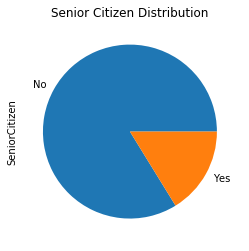

In [3]:
pd.value_counts(data['SeniorCitizen']).plot(kind="pie",title="Senior Citizen Distribution", labels=["No", "Yes"])

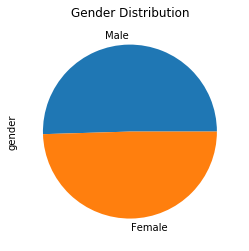

In [4]:
pd.value_counts(data['gender']).plot(kind="pie",title="Gender Distribution")

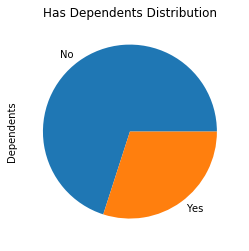

In [5]:
pd.value_counts(data['Dependents']).plot(kind="pie",title="Has Dependents Distribution")

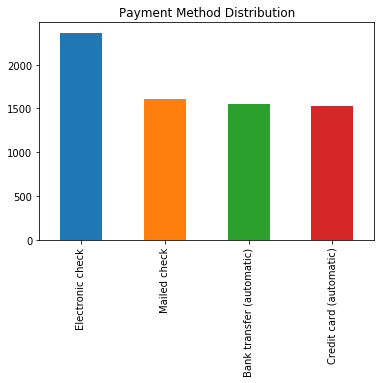

In [6]:
pd.value_counts(data['PaymentMethod']).plot(kind="bar",title="Payment Method Distribution")

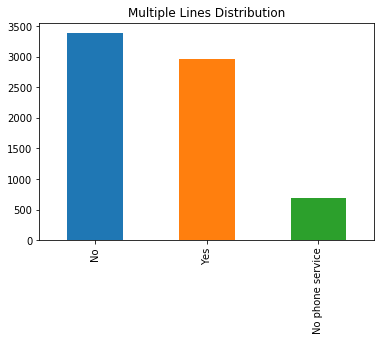

In [7]:
pd.value_counts(data['MultipleLines']).plot(kind="bar",title="Multiple Lines Distribution")

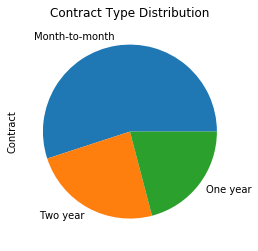

In [8]:
pd.value_counts(data['Contract']).plot(kind="pie",title="Contract Type Distribution")

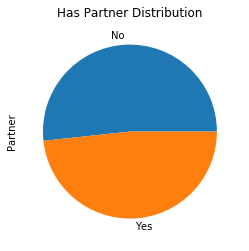

In [9]:
pd.value_counts(data['Partner']).plot(kind="pie",title="Has Partner Distribution")

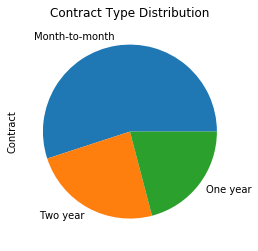

In [10]:
pd.value_counts(data['Contract']).plot(kind="pie",title="Contract Type Distribution")

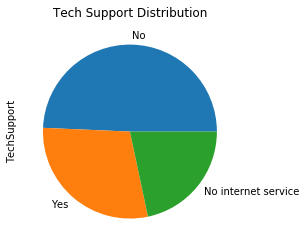

In [11]:
pd.value_counts(data['TechSupport']).plot(kind="pie",title="Tech Support Distribution")

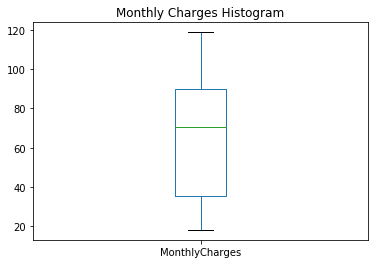

In [12]:
data['MonthlyCharges'].plot(kind="box",title="Monthly Charges Histogram", )

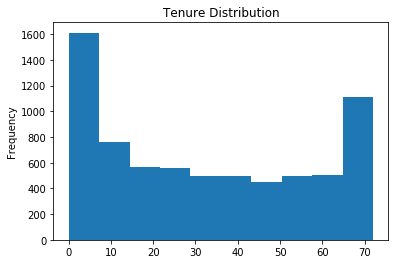

In [13]:
data['tenure'].plot(kind="hist",title="Tenure Distribution")

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [106]:
#Export the churn results field for model training and testing
churn_raw = data['Churn']
#drop the target variable and irrelevant customer unqiue id field.
features_raw = data.drop(columns={'Churn','customerID'})
#convert total charges field to numeric
features_raw.TotalCharges = pd.to_numeric(features_raw.TotalCharges, errors='coerce')
#fill an null values with 0
features_raw = features_raw.fillna(0)


### Implementation: Data Preprocessing


In [15]:
from sklearn.preprocessing import MinMaxScaler

#identify fields that will be min max scales
min_max_features = ["TotalCharges","MonthlyCharges","tenure"]
#identify fields that will be one-hot encoded
encoded_features = features_raw.drop(columns=min_max_features).columns
#intiailize the min max scaler with values from 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
#apply scaling for min max
features_raw[min_max_features] = scaler.fit_transform(features_raw[min_max_features])
#perform one-hot encoding on enconded features
features_final = pd.get_dummies(features_raw, columns=encoded_features)
#create dictionary to map behavior to numeric
# TODO: Encode the 'income_raw' data to numerical values
dict1 = {"Yes" : 1, "No": 0}
#apply dictionary to churn prediction
churn = churn_raw.map(dict1)
# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(len(features_final.columns)))


46 total features after one-hot encoding.


In [16]:
#copy data set for visualization
visualization = features_final.copy()
#apply predictive churn value to the visualization dataset
visualization['Churn'] = churn
#split churners and non churners
churned = visualization[visualization.Churn==1]
nochurned = visualization[visualization.Churn==0]
#apply the mean function to observe difference between encoded features
behavioral_differences = churned.mean()-nochurned.mean()


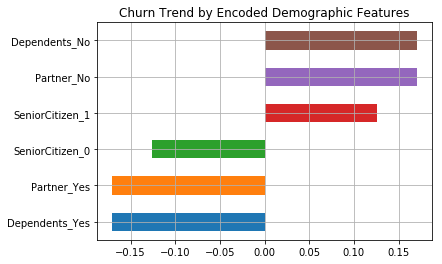

In [17]:
#import internal visualization library 
import charthelper as ch
ch.displayDifferences(behavioral_differences[3:11], "Churn Trend by Encoded Demographic Features", 'barh', .10)

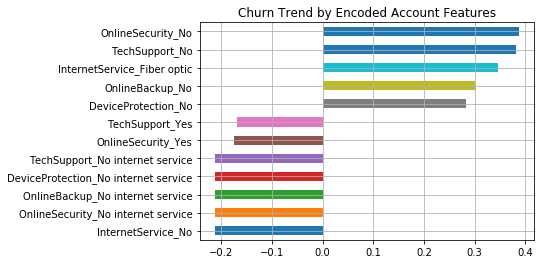

In [18]:
ch.displayDifferences(behavioral_differences[11:31], "Churn Trend by Encoded Account Features", 'barh', .15)

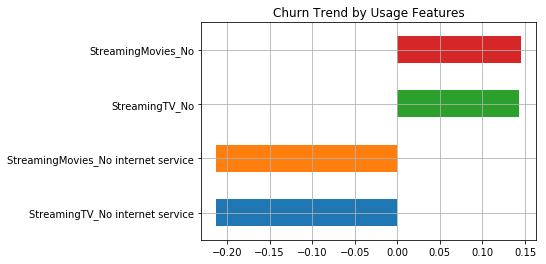

In [19]:
ch.displayDifferences(behavioral_differences[31:37], "Churn Trend by Usage Features", 'barh',.10)

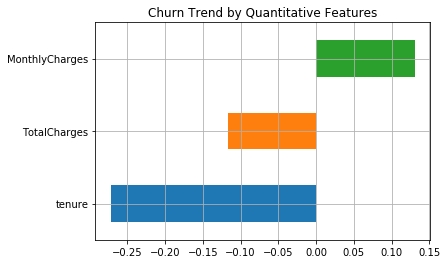

In [20]:
ch.displayDifferences(behavioral_differences[0:3], "Churn Trend by Quantitative Features", 'barh', .10)

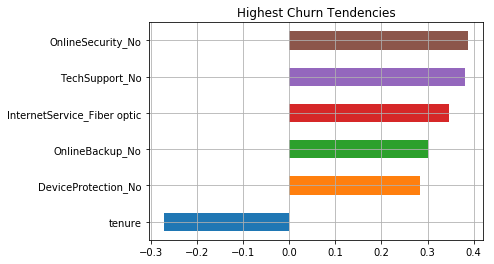

In [21]:
ch.displayDifferences(behavioral_differences[0:37], "Highest Churn Tendencies", 'barh', .25)

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [22]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    churn, 
                                                    test_size = 0.2, 
                                                    random_state = 41)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 5634 samples.
Testing set has 1409 samples.


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [33]:
#Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#Import scorer used to measure performance, fbeta score
from sklearn.metrics import fbeta_score, make_scorer

#Import grid search functionality got optimization testing
from sklearn.model_selection import GridSearchCV

#Import locally developed library for visualizations
import charthelper as ch

beta=2

scorer = make_scorer(fbeta_score, beta=beta)

#Initialize the three models
clf_A = DecisionTreeClassifier(random_state=42)
clf_B = MLPClassifier(activation='relu')
clf_C = AdaBoostClassifier(random_state=42)


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.

In [47]:
clf_DT = clf_A

start = time()

parameters = {
    'min_samples_split' : range(10,500,25),
    'max_depth': range(1,20,2)}

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_DT, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_DT = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_DT.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf_DT.predict(X_test)

end = time()

duration = end-start

Default Confusion Matrix : 
[[827 201]
 [188 193]]

Optimized Confusion Matrix : 
[[921 107]
 [187 194]]

Unoptimized model
------
Accuracy score on testing data: 0.7239
F-score on testing data: 0.5031

Optimized Model
------
Final accuracy score on the testing data: 0.7913
Final F-score on the testing data: 0.5315

Performance and Improvement
------
Time Taken: 7.4003
Accuracy Score Improvement: 0.0674
F Score Improvement: 0.0284



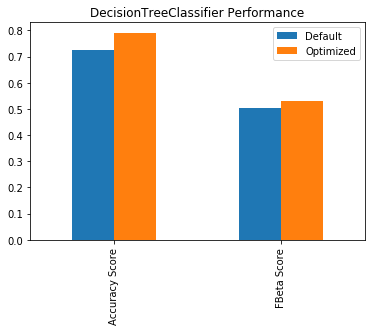

In [48]:
ch.displayAccuracies(y_test, predictions, best_predictions, beta, best_clf_DT.__class__.__name__, duration)

In [101]:
clf_MLP = clf_B

start = time()

#parameters = {'max_iter': [10,20, 25,30], 'alpha': 10.0 ** -np.arange(1, 5)}
parameters = {
    'hidden_layer_sizes': [30,40,50, 60],
    'max_iter': [10,20,30],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam']
}

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_MLP, parameters, scoring=scorer, verbose=1)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf_MLP = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_MLP.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf_MLP.predict(X_test)

end = time()

duration = end-start

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   25.7s finished


In [102]:
clf_C

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [105]:
best_clf_MLP

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=30, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Default Confusion Matrix : 
[[879 149]
 [178 203]]

Optimized Confusion Matrix : 
[[905 123]
 [172 209]]

Unoptimized model
------
Accuracy score on testing data: 0.7679
F-score on testing data: 0.5410

Optimized Model
------
Final accuracy score on the testing data: 0.7906
Final F-score on the testing data: 0.5630

Performance and Improvement
------
Time Taken: 30.0107
Accuracy Score Improvement: 0.0227
F Score Improvement: 0.0220



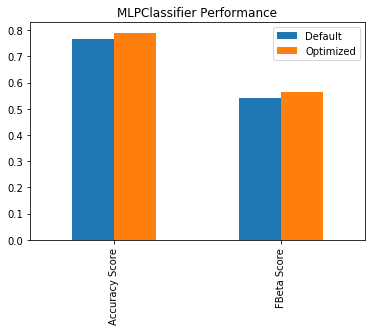

In [104]:
ch.displayAccuracies(y_test, predictions, best_predictions, beta, best_clf_LR.__class__.__name__, duration)

In [39]:
clf_Ada = clf_C

parameters = {"algorithm" : ["SAMME", "SAMME.R"],
              "learning_rate" : [0.01,0.05,0.1,0.15,0.2,0.25,0.3,1],
              "n_estimators": [20,25,30,35,40,45,50]
             }


# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf_Ada, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf_Ada = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_Ada.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf_Ada.predict(X_test)
duration = end-start

Default Confusion Matrix : 
[[913 115]
 [167 214]]

Optimized Confusion Matrix : 
[[913 115]
 [162 219]]

Unoptimized model
------
Accuracy score on testing data: 0.7999
F-score on testing data: 0.5774

Optimized Model
------
Final accuracy score on the testing data: 0.8034
Final F-score on the testing data: 0.5893

Performance and Improvement
------
Time Taken: 92.6067
Accuracy Score Improvement: 0.0035
F Score Improvement: 0.0119



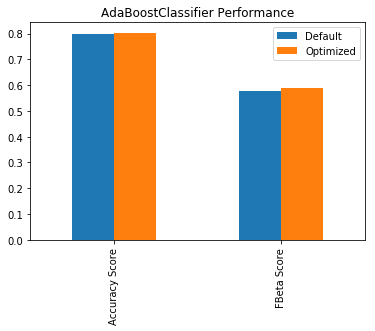

In [40]:
ch.displayAccuracies(y_test, predictions, best_predictions, beta, best_clf_Ada.__class__.__name__, duration)

### Implementation - Operationalizing the Model for Consumption


In [42]:
#improt picke for object serialization to place model and column defition to the project folder
import _pickle as cPickle
#dump the model and columndefinition
cPickle.dump(best_clf_Ada,open('model.pkl', 'wb'))
cPickle.dump(X_test.columns, open("columns.pkl",'wb'))

In [43]:
import requests, json

#if flask-api.py is running, use the script to execute the realtime decision.

#api_enabled is set to false by default to allow simulated call
api_enabled = 'false' 

#if api is running, set the appropriate connection details after running 'python flask-api.py' in a command-line

url = "http://localhost:9998/api"

#payload containing the features, expectation is churn prediction of 1
payload = {"tenure":3.0,"MonthlyCharges":79.9,"TotalCharges":260.9,"gender_Female":0.0,"gender_Male":1.0,
           "SeniorCitizen_0":0.0,"SeniorCitizen_1":1.0,"Partner_No":1.0,"Partner_Yes":0.0,"Dependents_No":1.0,
           "Dependents_Yes":0.0,"PhoneService_No":0.0,"PhoneService_Yes":1.0,"MultipleLines_No":1.0,
           "MultipleLines_No phone service":0.0,"MultipleLines_Yes":0.0,"InternetService_DSL":0.0,
           "InternetService_Fiber optic":1.0,"InternetService_No":0.0,"OnlineSecurity_No":1.0,
           "OnlineSecurity_No internet service":0.0,"OnlineSecurity_Yes":0.0,"OnlineBackup_No":1.0,
           "OnlineBackup_No internet service":0.0,"OnlineBackup_Yes":0.0,"DeviceProtection_No":1.0,
           "DeviceProtection_No internet service":0.0,"DeviceProtection_Yes":0.0,"TechSupport_No":1.0,
           "TechSupport_No internet service":0.0,"TechSupport_Yes":0.0,"StreamingTV_No":0.0,"StreamingTV_No internet service":0.0,
           "StreamingTV_Yes":1.0,"StreamingMovies_No":1.0,"StreamingMovies_No internet service":0.0,"StreamingMovies_Yes":0.0,
           "Contract_Month-to-month":1.0,"Contract_One year":0.0,"Contract_Two year":0.0,"PaperlessBilling_No":0.0,"PaperlessBilling_Yes":1.0,
           "PaymentMethod_Bank transfer (automatic)":0.0,"PaymentMethod_Credit card (automatic)":0.0,"PaymentMethod_Electronic check":1.0,
           "PaymentMethod_Mailed check":0.0}


#if api_enables, call the real-time service suing requests library, if not just use the simulated response.
if api_enabled=='true':
    r = requests.post(url, json=payload)
    print('Flask API Response' + r.json())
else:
    print("'Simulated Response' : {'Churn':1}")

'Simulated Response' : {'Churn':1}


In [107]:
# Install a pip package in the current Jupyter kernel
import sys


#if you wish to test the pmml package, run the cel below 
!{sys.executable} -m pip install sklearn2pmml
from sklearn2pmml import sklearn2pmml, PMMLPipeline, DataFrameMapper


#if the library is enabled, this will take the metadata, and model defintion and write the result to the project folder as ChurnModel.pmml
default_mapper = DataFrameMapper([(i, None) for i in X_test.columns])

from sklearn2pmml import sklearn2pmml
pipeline = PMMLPipeline([
	("mapper", default_mapper), ("classifier", best_clf_LR)
])
sklearn2pmml(pipeline, "ChurnModel.pmml")